In this Lab, we will practice in Numpy, Pandas and simple linear regression. We will use the dataset mtcars.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Use the dataset cars.csv 

In [2]:
cars_df = pd.read_csv(filepath_or_buffer='cars.csv')
cars_df.head()

,make,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


1.Convert the column mpg to numpy array and print the array. (5)

In [3]:
#Enter your code here
numpy_array = np.array(cars_df['mpg'])
print(numpy_array)
print(type(numpy_array))

[21.  21.  22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2
 10.4 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.  30.4
 15.8 19.7 15.  21.4]
<class 'numpy.ndarray'>


2. calculate how many cars' mpg is under 15. (5)

In [4]:
#Enter your code here
cars_df[cars_df['mpg'] < 15].shape

## calculate HOW MANY! (COME BACK!)

(5, 13)

3.Show the models that their mpg is under 15. (10)

In [5]:
#Enter your code here
cars_df[cars_df['mpg'] < 15]


,make,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
6,Duster,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
14,Cadillac,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,Lincoln,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
16,Chrysler,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
23,Camaro,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4


4.Show how many unique make does the dataset have and print them out. (10)

In [6]:
#Enter your code here
print(f"unique make: {cars_df['make'].unique()}")
print(f"total number of unique make: {cars_df['make'].nunique()}")

unique make: ['Mazda' 'Datsun' 'Hornet' 'Valiant' 'Duster' 'Merc' 'Cadillac' 'Lincoln'
 'Chrysler' 'Fiat' 'Honda' 'Toyota' 'Dodge' 'AMC' 'Camaro' 'Pontiac'
 'Porsche' 'Lotus' 'Ford' 'Ferrari' 'Maserati' 'Volvo']
total number of unique make: 22


5.Show how many cars each make has. (10)

In [7]:
#Enter your code here
cars_df['make'].value_counts()

make
Merc        7
Mazda       2
Fiat        2
Toyota      2
Hornet      2
Duster      1
Camaro      1
Maserati    1
Ferrari     1
Ford        1
Lotus       1
Porsche     1
Pontiac     1
AMC         1
Valiant     1
Dodge       1
Datsun      1
Honda       1
Chrysler    1
Lincoln     1
Cadillac    1
Volvo       1
Name: count, dtype: int64

6.Creat the scatter plot with X axis is hp and Y axis is mpg.(10)

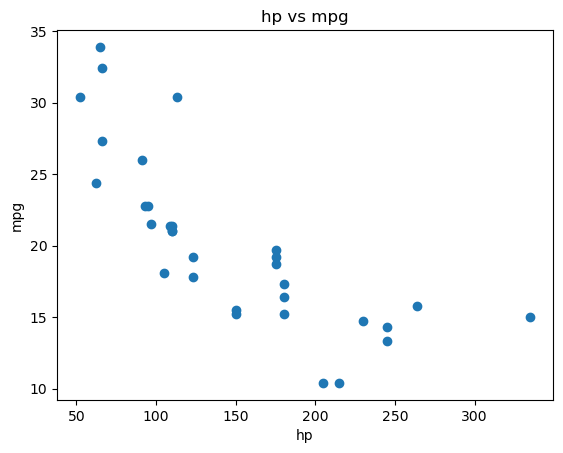

In [8]:
#Enter your code here
plt.scatter(x = cars_df['hp'], y = cars_df['mpg'])
plt.xlabel('hp')
plt.ylabel('mpg')
plt.title('hp vs mpg')
plt.show()

7.Train the linear model using hp as variable and MPG as target and print $\theta_{0}$, $\theta_{1}$ (10) 

(hint: use the fomula: $\theta = (\mathrm{X}^{T}\mathrm{X})^{-1}\mathrm{X}^{T}\mathrm{y}$)

In [31]:
# > training the linear model using OLS method
import statsmodels.api as sm

x = cars_df['hp']
y = cars_df['mpg']

# Add a constant to the independent variable 
x = sm.add_constant(x) # intercept (beta0) to the model (ensure model is unbiased)

# Fit the OLS model
model = sm.OLS(y, x).fit()


##########

# > printing out theta1 and theta 2

# Extract the coefficients
theta0 = model.params["const"]  # Intercept
theta1 = model.params["hp"]     # Slope

# Print the formula
print(f"Regression Formula: mpg = {theta0:.4f} + {theta1:.4f} * hp") # rounding to four decimal places




# Print the summary of the regression results
print(model.summary())


Regression Formula: mpg = 30.0989 + -0.0682 * hp
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           1.79e-07
Time:                        11:55:17   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

8.Plat the scatter plot again with the line showing the linear model.(10)

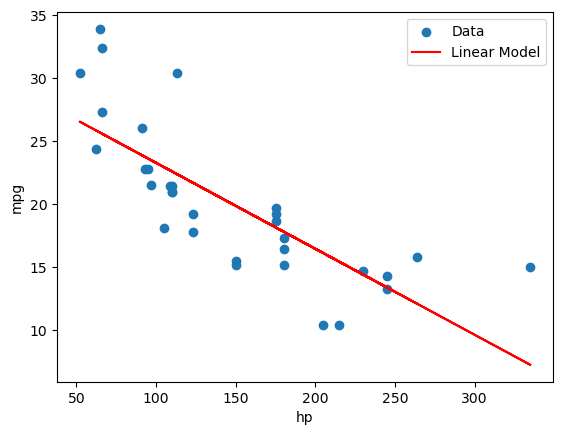

In [32]:
#Enter your code here
plt.scatter(x = cars_df['hp'], y = cars_df['mpg'], label = 'Data')

plt.plot(x['hp'], theta0 + theta1 *x['hp'], color = 'red', label = 'Linear Model')

plt.xlabel('hp')
plt.ylabel('mpg')
plt.legend()

plt.show()

9.Random choose 3 datapoint from the dataset, use the linear model to predict the MPG with HP, show the difference between predict value and real value. (10)

In [45]:
#Enter your code here
from sklearn.linear_model import LinearRegression


random_indices = np.random.choice(len(cars_df), 3, replace = False) # set of points to be chosen
random_data = cars_df.iloc[random_indices] # index location

X = random_data[['hp']].values
y_true = random_data[['mpg']].values


model = LinearRegression()
model.fit(X, y_true)

y_pred = model.predict(X)

difference = y_pred - y_true

print("Data Point Indices | Difference (Predicted - True MPG)")
for i, (index, diff) in enumerate(zip(random_indices, difference)):
    print(f"Data point {i+1}: {index} | {diff}")

Data Point Indices | Difference (Predicted - True MPG)
Data point 1: 20 | [1.92059868]
Data point 2: 12 | [-0.52226806]
Data point 3: 25 | [-1.39833061]


In [ ]:
#Enter your code here
random_index = np.random.randint(0, len(cars_df))

random_data_point = cars_df.iloc[random_index]

print("Random data point: ", random_data_point)

10.Explain the why some differences are large, some are not(10)

In [13]:
#Enter your answer here
# Some are differences are larger than others becuase these points are further away from 
# 

11.Find $\mathrm{R}^{2}$ and use $\mathrm{R}^{2}$ to explain whether the model is accurate.(10)

In [48]:
#Enter your code here
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

lm.score(x,y)

0.602437341423934